In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras

In [2]:
def generateTimeSeries(m, nSeq):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, m, 1)
    time = np.linspace(0, 1, nSeq)
    series = 0.5 * np.cos((time - offsets1) * (freq1 * 10 +10))
    series += 0.3 * np.sin((time - offsets2) * (freq2 * 20 +20))
    series += 0.1 * (np.random.rand(m, nSeq) - 0.5)
    return series[..., np.newaxis]. astype(np.float32)

In [3]:
np.random.seed(1)
nSeq = 30
nPred = 1

series = generateTimeSeries(5000, nSeq + nPred)
series.shape

(5000, 31, 1)

In [4]:
xTrain, yTrain = series[:3000, :nSeq], series[:3000, -1]
xValid, yValid = series[3000:4000, :nSeq], series[3000:4000, -1]
xTest, yTest = series[4000:, :nSeq], series[4000:, -1]

In [5]:
xTrain.shape, yTrain.shape

((3000, 30, 1), (3000, 1))

In [6]:
def plotSeq(x, y, yPred = None):
    plt.plot(x,'.-')
    nSeq = x.shape[0]
    ahead = y.shape[0]
    plt.plot(np.arange(nSeq, nSeq + ahead), y, 'go-', label='y')
    if yPred is not None:
        plt.plot(np.arange(nSeq, nSeq + ahead), yPred, 'rx-', label='$\hat y $', markersize=10)
    plt.hlines(0, 0, nSeq + ahead, linewidth=1)
    plt.axis([0, nSeq + ahead, -1 , 1])
    plt.grid(True)
    plt.legend(fontsize=14)

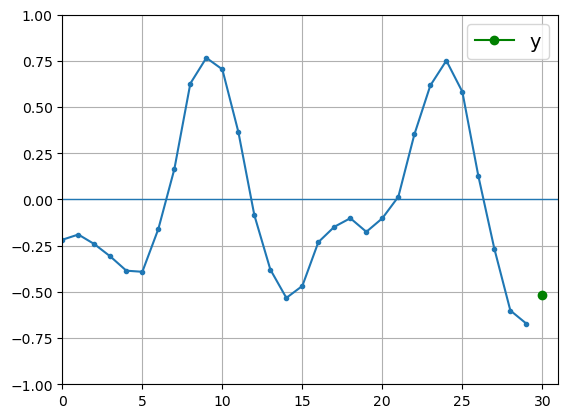

In [7]:
plotSeq(xTest[0, :, 0], yTest[0])

Simple RNN

In [8]:
np.random.seed(1)
tf.random.set_seed(1)

In [9]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
opt = keras.optimizers.Adam(learning_rate=.05)
model.compile(loss='mse', optimizer=opt)

In [11]:
train = model.fit(xTrain, yTrain, epochs=20, validation_data=(xValid, yValid))

Epoch 1/20
94/94 [==============================] - 0s 2ms/step - loss: 0.0465 - val_loss: 0.0287
Epoch 2/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0301 - val_loss: 0.0289
Epoch 3/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0301 - val_loss: 0.0291
Epoch 4/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0303 - val_loss: 0.0287
Epoch 5/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0301 - val_loss: 0.0286
Epoch 6/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0301 - val_loss: 0.0285
Epoch 7/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0301 - val_loss: 0.0287
Epoch 8/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0302 - val_loss: 0.0285
Epoch 9/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0299 - val_loss: 0.0284
Epoch 10/20
94/94 [==============================] - 0s 1ms/step - loss: 0.0303 - val_loss: 0.0306
Epoch 11/20
94/94 [

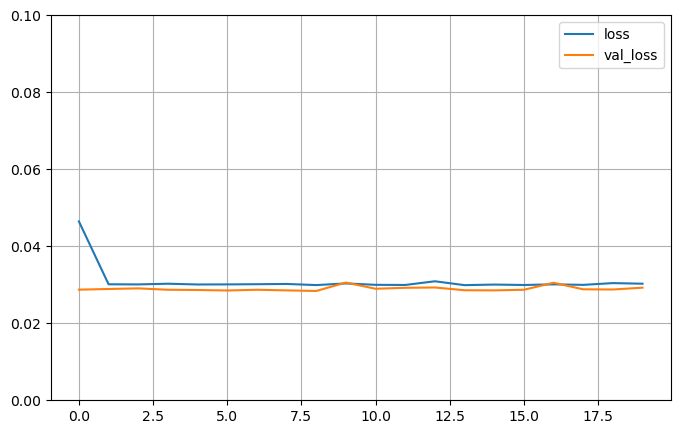

In [12]:
pd.DataFrame(train.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 0.1)
plt.show()

In [13]:
model.evaluate(xTest, yTest)

32/32 [==============================] - 0s 547us/step - loss: 0.0310


0.03099316731095314

In [14]:
yPred = model.predict(xTest)

32/32 [==============================] - 0s 666us/step


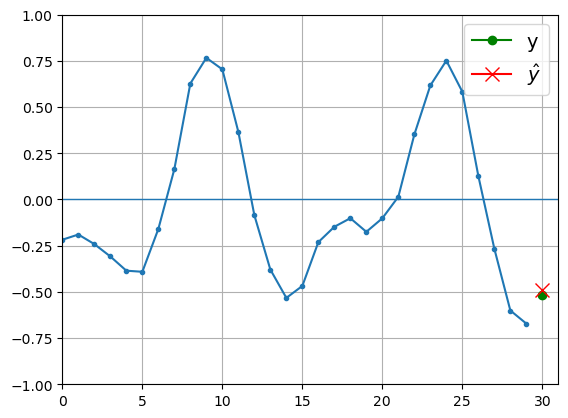

In [15]:
i = 0
plotSeq(xTest[i,:, 0], yTest[i], yPred[i])

Deep RNN

In [16]:
np.random.seed(1)
tf.random.set_seed(1)

In [17]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape = [None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1) ])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 20)          820       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1)                 22        
                                                                 
Total params: 1282 (5.01 KB)
Trainable params: 1282 (5.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(loss='mse', optimizer='adam')

In [20]:
train = model.fit(xTrain, yTrain, epochs = 20, validation_data=(xValid, yValid))

Epoch 1/20
94/94 [==============================] - 1s 6ms/step - loss: 0.2998 - val_loss: 0.0585
Epoch 2/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0329 - val_loss: 0.0195
Epoch 3/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0170 - val_loss: 0.0127
Epoch 4/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0120 - val_loss: 0.0109
Epoch 5/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0099 - val_loss: 0.0098
Epoch 6/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0084 - val_loss: 0.0083
Epoch 7/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0076 - val_loss: 0.0074
Epoch 8/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 0.0067
Epoch 9/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0069 - val_loss: 0.0075
Epoch 10/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0068 - val_loss: 0.0063
Epoch 11/20
94/94 [

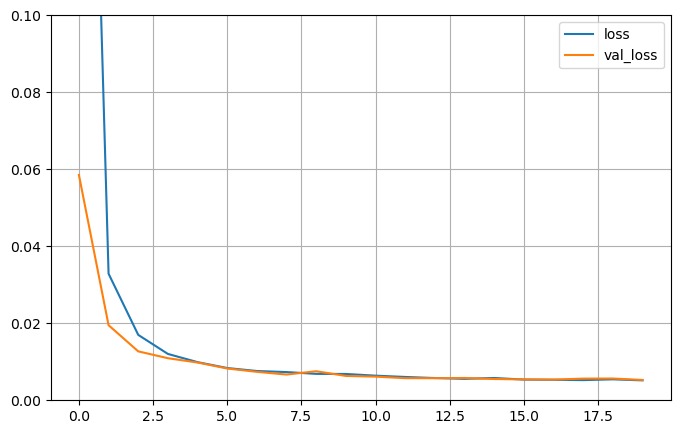

In [21]:
pd.DataFrame(train.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 0.1)
plt.show()

In [22]:
model.evaluate(xTest, yTest)

32/32 [==============================] - 0s 1ms/step - loss: 0.0054


0.005369337275624275

In [23]:
yPred = model.predict(xTest)

32/32 [==============================] - 0s 1ms/step


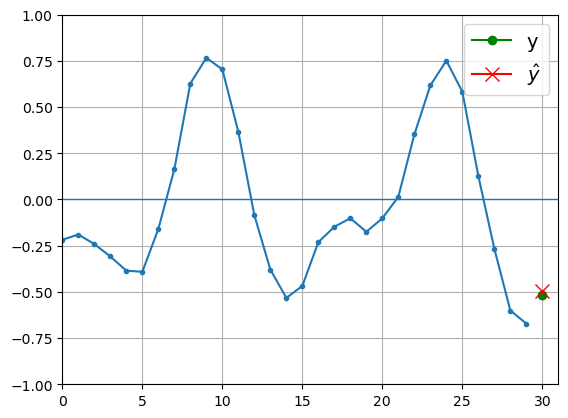

In [24]:
i = 0
plotSeq(xTest[i, :, 0], yTest[i], yPred[i])

Deep RNN (dense output layer)

In [25]:
np.random.seed(1)
tf.random.set_seed(1)

In [26]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 20)                820       
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1281 (5.00 KB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.compile(loss='mse', optimizer='adam')

In [29]:
train = model.fit(xTrain, yTrain, epochs=20, validation_data=(xValid, yValid))

Epoch 1/20
94/94 [==============================] - 1s 4ms/step - loss: 0.0650 - val_loss: 0.0216
Epoch 2/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0157 - val_loss: 0.0124
Epoch 3/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0090
Epoch 4/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.0079
Epoch 5/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.0070
Epoch 6/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.0060
Epoch 7/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.0063
Epoch 8/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 9/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 0.0052
Epoch 10/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 11/20
94/94 [

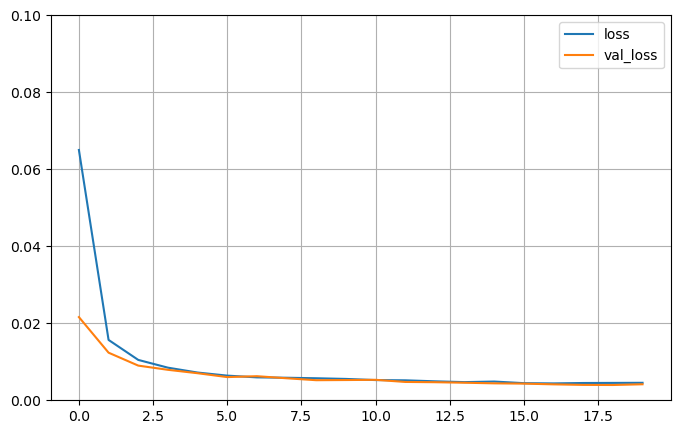

In [30]:
pd.DataFrame(train.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, .1)
plt.show()

In [31]:
model.evaluate(xTest, yTest)

32/32 [==============================] - 0s 834us/step - loss: 0.0045


0.00449592899531126

In [32]:
yPred = model.predict(xTest)

32/32 [==============================] - 0s 1ms/step


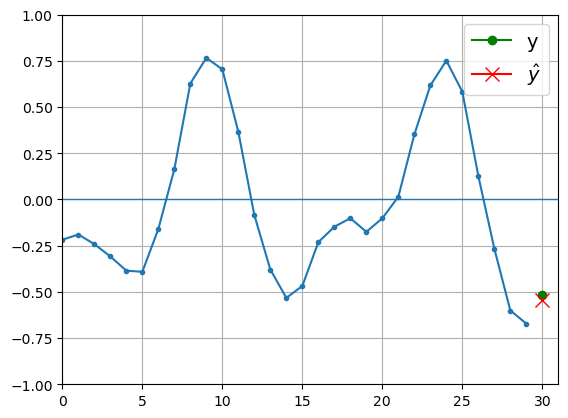

In [33]:
i = 0
plotSeq(xTest[i, :, 0], yTest[i], yPred[i])